In [1]:
import numpy as np

from fondsweb import fondsweb as fw

In [2]:
config = fw.fetch_config()
config

{'url_ts': 'https://cf.fww.de/ws/timeseries-jsonp/2.1/ts.js',
 'api_key': 'iDnLoTi2H6E7ntCdWNvepFDp4rpRuFyx',
 'ts': '20251031',
 'sth': '14dec91c9535e76eb82382612b8072b8a3bdf46e',
 'range': 'max',
 'eur': '1'}

In [3]:
ISIN="IE00B4L5Y983"
df = fw.get_fund_timeseries(ISIN, config=config)
df

,date,value
0,2009-09-25,100.00
1,2009-09-28,101.24
2,2009-10-12,102.06
3,2009-10-26,99.74
4,2009-11-09,101.60
...,...,...
741,2025-10-23,657.51
742,2025-10-24,660.64
743,2025-10-27,666.20
744,2025-10-28,667.90


In [4]:
df_filtered = fw.get_fund_between(df, "20250601", "20251231")

<Axes: xlabel='date'>

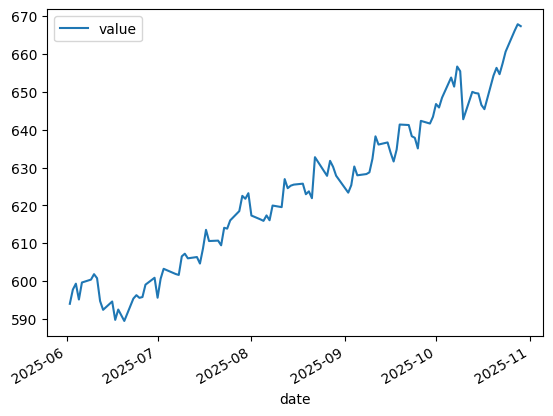

In [5]:
df_filtered.plot(x="date", y="value")

In [6]:
fw.get_fund_performance(df, "20240101", "20241231")

26.114506927465367

In [7]:
fw.get_fund_volatility(df, "20250101")

0.1725463662376225

In [8]:
isins = ["IE00B4L5Y983", "LI0393642439", "IE00B7G7VV19", "LI0181971842", "LU0797053815", "LU0797053906", "DE000ANTE1V9"]
fonds={}
for isin in isins:
    df_temp = fw.get_fund_timeseries(isin, config=config)
    fonds[isin] = df_temp

In [9]:
isins = ["IE00B4L5Y983", "LI0393642439", "IE00B7G7VV19", "LI0181971842", "LU0797053815", "LU0797053906", "DE000ANTE1V9"]
start_date="20250601"
for isin in isins:
    df_temp = fonds[isin]
    df_fil = df_temp[df_temp["date"] > start_date]
    perf = fw.get_fund_performance(df_fil, start_date)
    vola = fw.get_fund_volatility(df_fil, start_date)
    print(f"{isin}: {round(perf, 2)}, {round(vola, 2)}")


IE00B4L5Y983: 12.35, 0.09
LI0393642439: 15.16, 0.11
IE00B7G7VV19: 17.99, 0.11
LI0181971842: 14.73, 0.11
LU0797053815: 18.95, 0.12
LU0797053906: 18.8, 0.12
DE000ANTE1V9: 4.02, 0.04


<Axes: xlabel='date'>

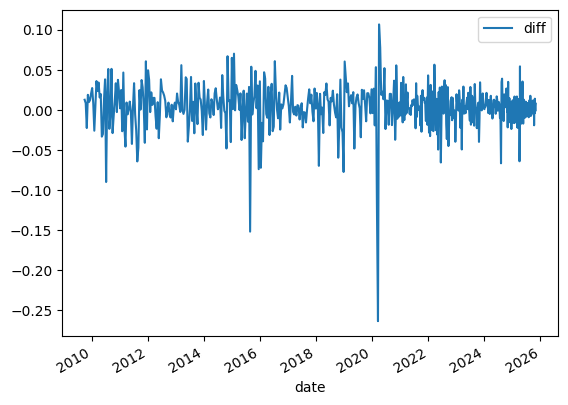

In [10]:
df["diff"] = np.log1p(df['value'].pct_change())
df.plot(x="date", y="diff")

In [11]:
df["diff"].median(), df["diff"].mean(), df["diff"].std()

(np.float64(0.0031356391602840082),
 np.float64(0.0025479253646963755),
 np.float64(0.024006171088938738))